### 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확히 분류하는것이 중요
- 보통 이상 데이터가 target값이 되는 경우가 많다. 
- 데이터가 불균형할 때는 분류의 성능과 Target 데이터를 정확히 분류해내는 목표가 일치하지 않게 되는 문제 발생
- 이러한 경우 분석 결과의 해석뿐만 아니라 머신러닝 등 모델링에서도 문제가 발생
- 소수의 데이터인 Target의 중요도를 낮게 판단하므로 궁극적으로 분석가능한 모델을 만들수 없다. 
- 이러한 문제를 해결하기 위해 소수의 비정상 데이터를 늘리는 오버 샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더 샘플링이 존재


### 언더샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 라벨의 수 수준으로 감소시키는 기법
- 이 기법은 데이터 불균형 문제를 해결 할 수는 있지만 전체 데이터의 수가 급격하게 줄어들어 학습 성능을 떨어뜨릴 수 있다. 

In [56]:
!pip install imbalanced-learn

In [57]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


## 랜덤 데이터를 95:1 불균형 데이터 생성

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [58]:
## 랜덤 언더 샘플링은 다수를 차지하는 라벨에서 무작위로 데이터를 제거하는 방법
## sampling_stratery속성의 값을 majority로 지정하면 다수 라벨의 데이터를 샘플링하여 소수 라벨의 데이터 수와 동일하게 줄인다. 
## 0과 1 사이의 숫자 값을 지정하면 소수 라벨의 데이터 수와 다수 라벨의 데이터 수가 해당 비율이 되도록 조정

undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [59]:
undersample = RandomUnderSampler(sampling_strategy=0.5) 
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


### 오버샘플링
- 소수의 라벨을 지닌 데이터세트를 다수 라벨을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 방법
- 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [60]:
## 랜덤 오버 샘플링 
## 소수의 라벨을 지닌 데이터세트를 단순 복제하여 다수의 라벨과 비율을 맞추는 방법
## 데이터를 단순하게 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있음
## 오버피팅의 위험성이 있지만 분균형 문제를 처리하지 않는 것보다는 유효하다

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5) 
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [61]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [62]:
## SMOTE(Synthetic Minority Over-sampling Technique)
## 소수 라벨을 지닌 데이터세트의 관측 값에 대한 K개의 최근접 아웃을 찾고, 
# 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


In [63]:
x[:,1]

array([ 1.65936064, -0.22993577,  0.50932638, ...,  0.8411145 ,
       -0.48099572, -1.23029469])

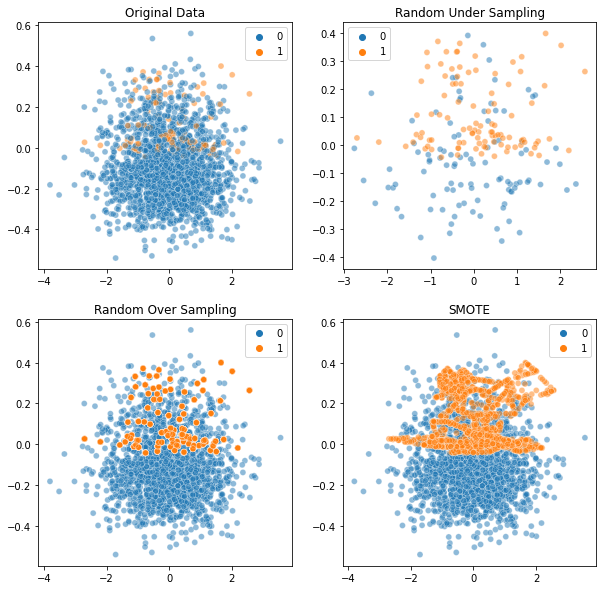

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x= x[:, 1], y= x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x= x_under[:, 1], y= x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()